In [ ]:
import pandas as pd
df = pd.read_csv("../data/credit_card_transactions.csv")

In [5]:
print(df.head())

   TransactionID                 Time  Amount     CardholderName  \
0              1  2025-03-09 06:23:57   83.54       Sarah Murray   
1              2  2025-02-14 05:17:36  805.88   Alexander Brooks   
2              3  2024-05-03 15:28:52  450.49       Harold Perez   
3              4  2024-05-03 09:01:14  782.39      Rebecca Davis   
4              5  2025-04-24 17:24:39  713.02  Lauren Benson DDS   

     MerchantName   MCC            Location   Device        IPAddress  \
0  Oconnor-Hughes  5411            Longtown  Android    102.247.49.50   
1        Reed PLC  5261           Woodsland      POS     153.157.50.7   
2       Berry LLC  5261         Jessicatown      iOS  151.174.154.123   
3        Berg Inc  5968  North Krystalburgh  Android    130.70.79.149   
4     King-Gaines  5968   East Danielletown  Android   195.136.16.190   

   TransactionSpeed  Fraud  
0             38.17      0  
1             49.84      0  
2             48.79      0  
3              8.71      0  
4      

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [8]:
df.describe()

,TransactionID,Amount,MCC,TransactionSpeed,Fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,547.347491,5950.102900,30.738446,0.019200
std,2886.89568,460.047329,664.526287,19.092345,0.137234
min,1.00000,10.090000,5261.000000,0.110000,0.000000
25%,2500.75000,263.222500,5411.000000,14.910000,0.000000
50%,5000.50000,512.240000,5812.000000,29.655000,0.000000
75%,7500.25000,759.935000,5968.000000,45.270000,0.000000
max,10000.00000,4988.070000,7299.000000,119.860000,1.000000


In [9]:
df.isnull().sum()

TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64

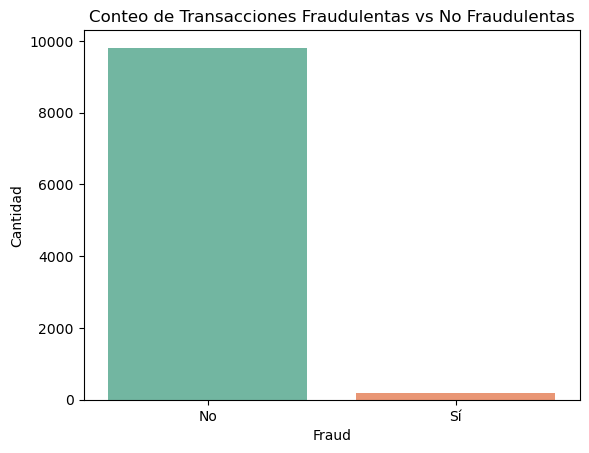

Fraud
0    98.08
1     1.92
Name: proportion, dtype: float64


In [19]:
sns.countplot(x='Fraud', data=df, palette='Set2')
plt.title("Conteo de Transacciones Fraudulentas vs No Fraudulentas")
plt.xticks([0,1], ['No', 'Sí'])
plt.ylabel("Cantidad")
plt.show()

# Porcentaje
porcentaje = df['Fraud'].value_counts(normalize=True) * 100
print(porcentaje)


c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


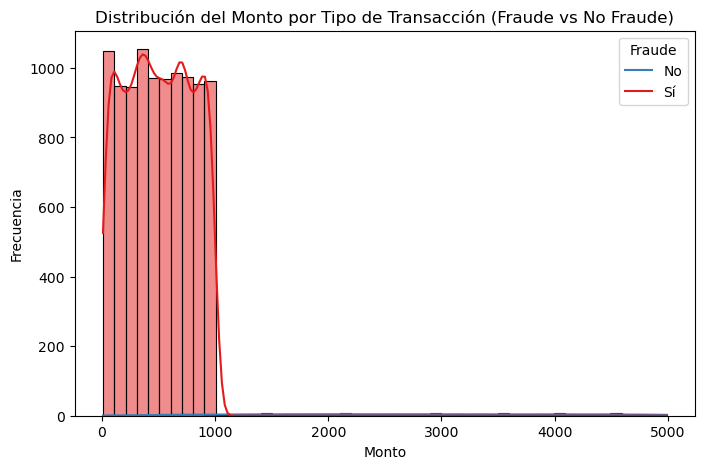

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución del monto
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Amount', hue='Fraud', kde=True, palette='Set1', bins=50)
plt.title("Distribución del Monto por Tipo de Transacción (Fraude vs No Fraude)")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()

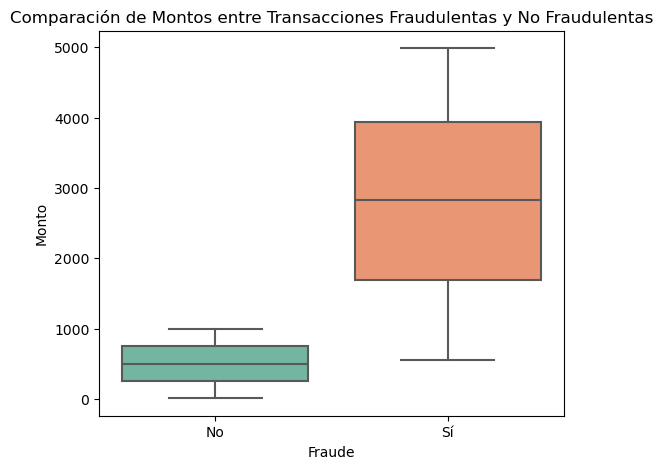

In [20]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Fraud', y='Amount', data=df, palette='Set2')
plt.title("Comparación de Montos entre Transacciones Fraudulentas y No Fraudulentas")
plt.xlabel("Fraude")
plt.ylabel("Monto")
plt.xticks([0,1], ['No', 'Sí'])
plt.show()


<Axes: ylabel='Amount'>

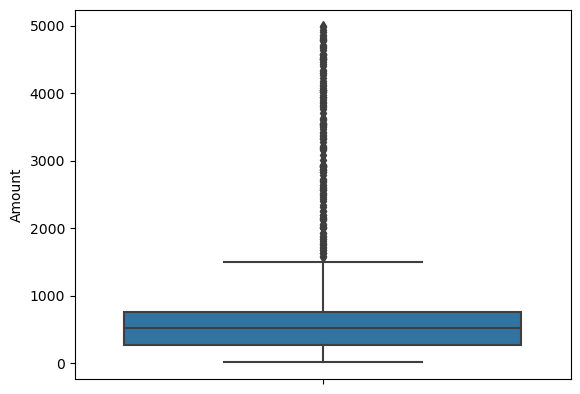

In [21]:
sns.boxplot(y='Amount', data=df)


c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


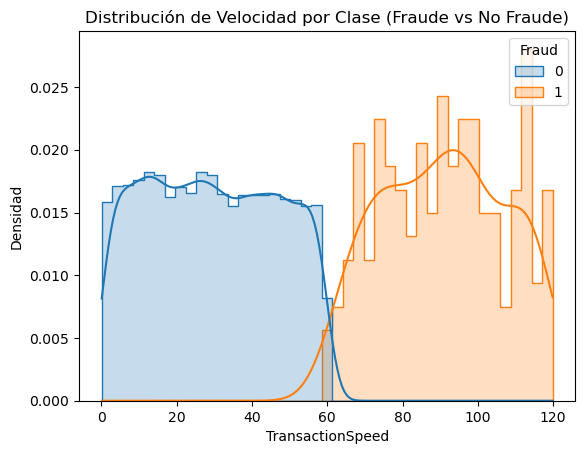

In [13]:
sns.histplot(data=df, x='TransactionSpeed', hue='Fraud', kde=True, element='step', stat='density', common_norm=False)
plt.title("Distribución de Velocidad por Clase (Fraude vs No Fraude)")
plt.xlabel("TransactionSpeed")
plt.ylabel("Densidad")
plt.show()

c:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


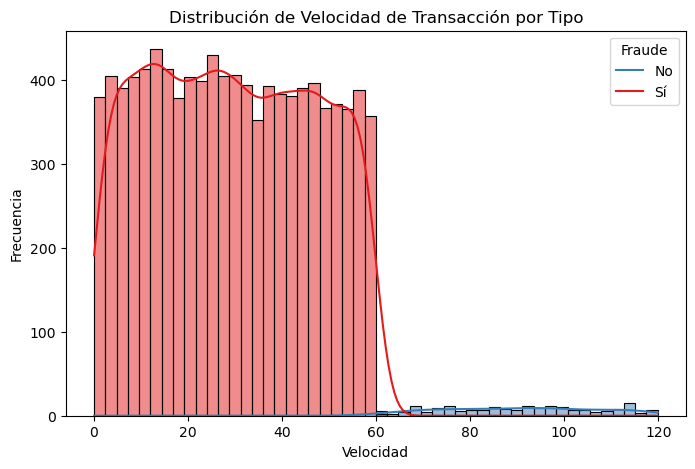

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='TransactionSpeed', hue='Fraud', kde=True, palette='Set1', bins=50)
plt.title("Distribución de Velocidad de Transacción por Tipo")
plt.xlabel("Velocidad")
plt.ylabel("Frecuencia")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()


In [22]:
df_temp = df.copy()

In [23]:
df_temp['Time'] = pd.to_datetime(df_temp['Time'])

# Crear el segundo DataFrame con nuevas columnas extraídas
df_extendido = df_temp.copy()
df_extendido['Hour'] = df_temp['Time'].dt.hour
df_extendido['Day'] = df_temp['Time'].dt.day
df_extendido['Month'] = df_temp['Time'].dt.month
df_extendido['Weekday'] = df_temp['Time'].dt.weekday  # 0=Lunes, 6=Domingo

# (Opcional) Mostrar las primeras filas del nuevo DataFrame extendido
print(df_extendido.head())

   TransactionID                Time  Amount     CardholderName  \
0              1 2025-03-09 06:23:57   83.54       Sarah Murray   
1              2 2025-02-14 05:17:36  805.88   Alexander Brooks   
2              3 2024-05-03 15:28:52  450.49       Harold Perez   
3              4 2024-05-03 09:01:14  782.39      Rebecca Davis   
4              5 2025-04-24 17:24:39  713.02  Lauren Benson DDS   

     MerchantName   MCC            Location   Device        IPAddress  \
0  Oconnor-Hughes  5411            Longtown  Android    102.247.49.50   
1        Reed PLC  5261           Woodsland      POS     153.157.50.7   
2       Berry LLC  5261         Jessicatown      iOS  151.174.154.123   
3        Berg Inc  5968  North Krystalburgh  Android    130.70.79.149   
4     King-Gaines  5968   East Danielletown  Android   195.136.16.190   

   TransactionSpeed  Fraud  Hour  Day  Month  Weekday  
0             38.17      0     6    9      3        6  
1             49.84      0     5   14      2  

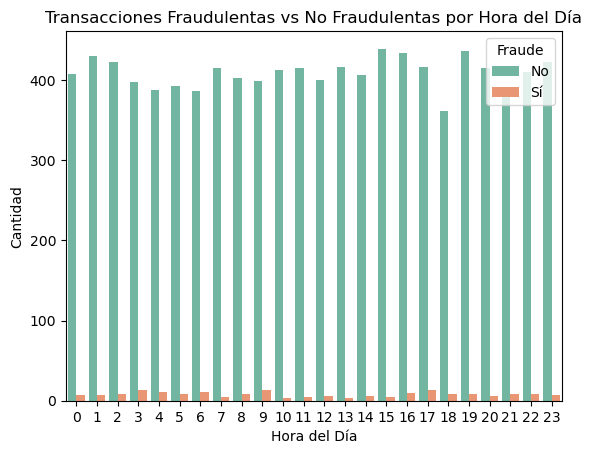

In [25]:
df_extendido['Fraud'] = df_extendido['Fraud'].astype(str)

sns.countplot(x='Hour', hue='Fraud', data=df_extendido, palette='Set2')
plt.title("Transacciones Fraudulentas vs No Fraudulentas por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Cantidad")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()


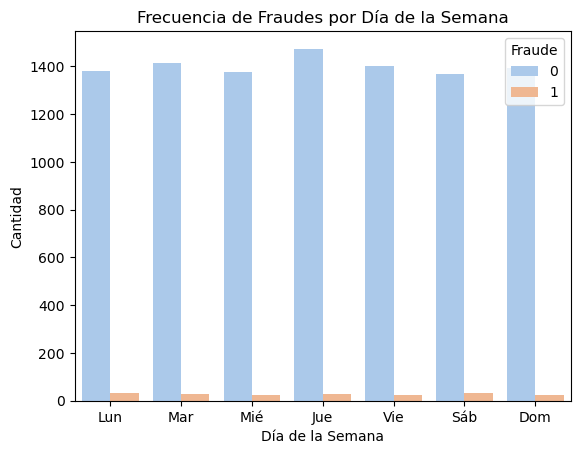

In [26]:
dias = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
sns.countplot(x='Weekday', hue='Fraud', data=df_extendido, palette='pastel')
plt.title("Frecuencia de Fraudes por Día de la Semana")
plt.xticks(ticks=range(7), labels=dias)
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad")
plt.legend(title="Fraude")
plt.show()


In [ ]:
df_feature = df_temp.copy()


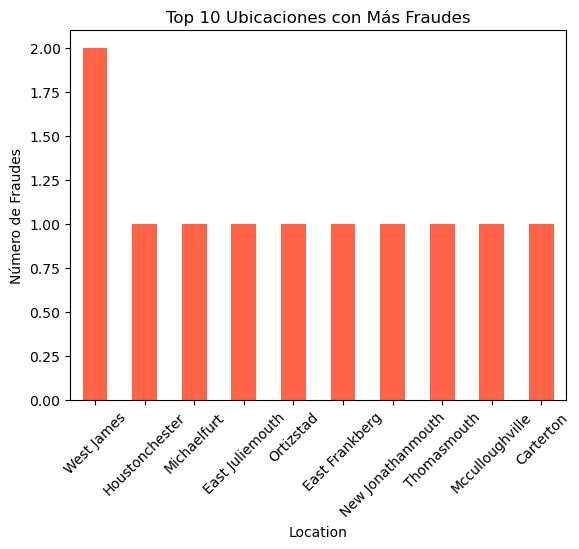

In [35]:
top_locs = df_feature[df_feature['Fraud'] == 1]['Location'].value_counts().head(10)
top_locs.plot(kind='bar', color='tomato')
plt.title("Top 10 Ubicaciones con Más Fraudes")
plt.ylabel("Número de Fraudes")
plt.xticks(rotation=45)
plt.show()
